In [1]:
import pandas as pd
import cv2 as c
import time as t
import uuid

In [2]:
img_pth=r'C:\Users\Anurag\OneDrive\Desktop\PROJECTS\HANDSIGN\AOT'

In [9]:
signs=[0,1,2,3]
nu_im=20

In [ ]:
import os as o


for s in signs:
    o.makedirs(o.path.join(img_pth, s), exist_ok=True)
    
    cap = c.VideoCapture(0)
    print(f'image_collection : {s}')
    
    t.sleep(3)
    
    for im_num in range(nu_im):
        ret, frame = cap.read()
        i_nam = o.path.join(img_pth, s, f'{s}.{str(uuid.uuid1())}.jpg')
        c.imwrite(i_nam, frame)
        c.imshow('fem', frame)
        t.sleep(2)

        if c.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    c.destroyAllWindows()
    
        




image_collection : HELLO


: 

: 

x: 0.8690703
y: 0.9683937
z: 4.796805e-07

x: 0.7813836
y: 0.94578654
z: -0.061023697

x: 0.6996667
y: 0.89585394
z: -0.12000654

x: 0.6335909
y: 0.8456673
z: -0.17211509

x: 0.5775811
y: 0.79573107
z: -0.22969486

x: 0.75723034
y: 0.77788943
z: -0.14657167

x: 0.7616626
y: 0.60977256
z: -0.21032917

x: 0.768607
y: 0.50043094
z: -0.24847427

x: 0.77795523
y: 0.41200638
z: -0.27357674

x: 0.83994246
y: 0.77718294
z: -0.15015742

x: 0.83791894
y: 0.5766207
z: -0.20745356

x: 0.8398914
y: 0.4419258
z: -0.24357352

x: 0.84257984
y: 0.32875094
z: -0.27052113

x: 0.9127438
y: 0.7963898
z: -0.15419956

x: 0.90641105
y: 0.6062338
z: -0.2080272

x: 0.90378904
y: 0.4814839
z: -0.23957744

x: 0.8976887
y: 0.37988916
z: -0.25968444

x: 0.97985727
y: 0.8226066
z: -0.1603988

x: 0.9782306
y: 0.6863186
z: -0.20813262

x: 0.97114664
y: 0.5921835
z: -0.22869085

x: 0.9573491
y: 0.51182747
z: -0.24097686

x: 0.8243003
y: 0.55243474
z: -1.0428952e-06

x: 0.7704851
y: 0.66966075
z: -0.05272706

x: 0.67976

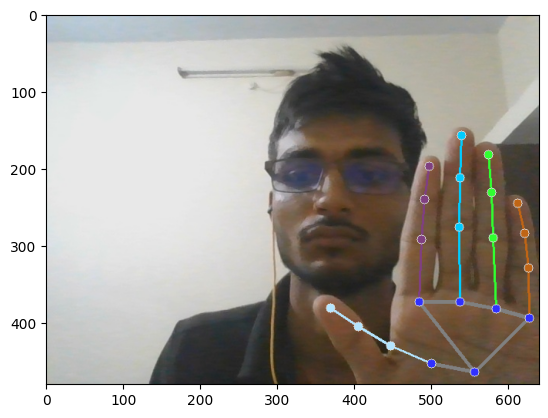

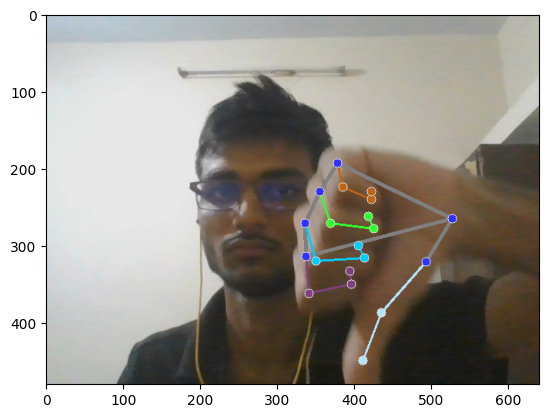

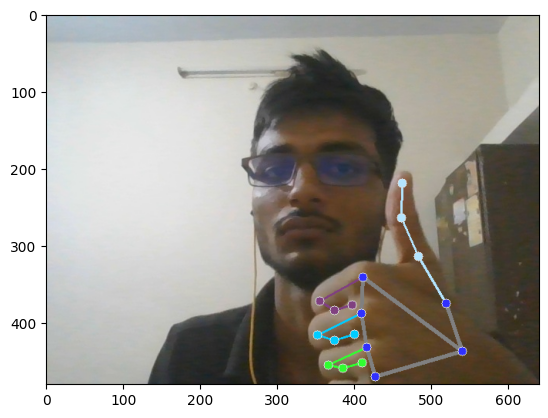

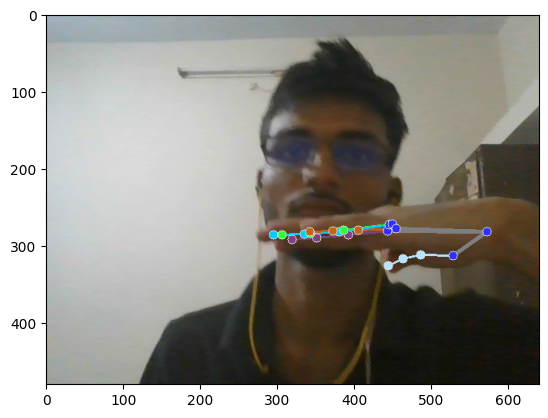

In [10]:
#creation of dataset
import os as o
import mediapipe as m
import matplotlib.pyplot as mp

m_hn=m.solutions.hands
m_draw=m.solutions.drawing_utils
m_draw_styl=m.solutions.drawing_styles

hnds=m_hn.Hands(static_image_mode=True,min_detection_confidence=0.7)


data='./AOT'
for dir_ in o.listdir(data):
    for i_pth in o.listdir(o.path.join(data,dir_))[:1]:
        im=c.imread(o.path.join(data,dir_,i_pth))
        im_rgb=c.cvtColor(im,c.COLOR_BGR2RGB)
        result=hnds.process(im_rgb)
        if result.multi_hand_landmarks:
         for hnd_lndmrk in result.multi_hand_landmarks:
            m_draw.draw_landmarks(im_rgb,hnd_lndmrk,m_hn.HAND_CONNECTIONS,m_draw_styl.get_default_hand_landmarks_style(),m_draw_styl.get_default_hand_connections_style())

            for i in range(len(hnd_lndmrk.landmark)):
               print((hnd_lndmrk.landmark[i]))
           
        


        mp.figure()
        mp.imshow(im_rgb)

mp.show()                


In [6]:
col=[]
trget=[]
for dir_ in o.listdir(data):
 for i_pth in o.listdir(o.path.join(data,dir_)):
    dt_au=[]
    im=c.imread(o.path.join(data,dir_,i_pth))
    im_rgb=c.cvtColor(im,c.COLOR_BGR2RGB)
    result=hnds.process(im_rgb)
    if result.multi_hand_landmarks:
        for hnd_lndmrk in result.multi_hand_landmarks:
            for i in range(len(hnd_lndmrk.landmark)):
               x=hnd_lndmrk.landmark[i].x
               y=hnd_lndmrk.landmark[i].y
               dt_au.append(x)
               dt_au.append(y)

        col.append(dt_au)
        trget.append(dir_)       




   

In [8]:
import joblib as j
f=open('dataset','wb')
j.dump({'col':col,"target":trget},f)
f.close()